###

## Linear Regression: Student Performance Analysis and Prediction

### Import necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read the Dataset

In [4]:
df = pd.read_csv(r"C:\Users\dell\Desktop\Projects\Multilinear regression\Student_Performance.csv")

In [5]:
df.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


### Transforming the categorical 'Extracurricular Activities' column into a numerical format for better model compatibility.

In [6]:
df.columns
df['Extracurricular Activities1'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities1
0,7,99,Yes,9,1,91.0,1
1,4,82,No,4,2,65.0,0
2,8,51,Yes,7,2,45.0,1
3,5,52,Yes,5,2,36.0,1
4,7,75,No,8,5,66.0,0
...,...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0,1
9996,7,64,Yes,8,5,58.0,1
9997,6,83,Yes,8,5,74.0,1
9998,9,97,Yes,7,0,95.0,1




### Identifying the independent variables (X) and the dependent variable (y).

In [7]:

# independent feature and dependent features
X= df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities1',
       'Sleep Hours', 'Sample Question Papers Practiced']]
y= df['Performance Index']



 ### This code snippet takes the prepared data (X and y) and divides it into training and testing sets. The model will be trained using the training data (X_train, y_train) and then its performance will be assessed using the testing data (X_test, y_test). The split ratio is 70% for training and 30% for testing, and the random_state ensures the split is reproducible.

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [9]:
X_train

,Hours Studied,Previous Scores,Extracurricular Activities1,Sleep Hours,Sample Question Papers Practiced
9069,4,99,1,6,1
2603,6,90,1,9,3
7738,8,57,0,6,1
1579,6,92,1,8,7
5058,6,64,1,8,4
...,...,...,...,...,...
5734,8,50,1,6,6
5191,4,68,0,9,3
5390,9,48,0,7,6
860,1,47,0,9,0


In [10]:
X_test

,Hours Studied,Previous Scores,Extracurricular Activities1,Sleep Hours,Sample Question Papers Practiced
6252,5,69,0,8,2
4684,2,46,1,4,8
1731,7,56,1,7,5
4742,6,42,1,8,5
4521,7,53,0,4,6
...,...,...,...,...,...
8014,6,42,1,9,5
1074,2,60,0,7,7
3063,5,48,1,6,4
6487,3,86,1,9,5


## Data Standardization
This part of the code focuses on standardizing the dataset, specifically the independent variables (features) stored in X_train and X_test. Standardization is a crucial preprocessing step in machine learning that transforms the data to have zero mean and unit variance.

### Why is this important?

Many machine learning algorithms perform better when the features are on a similar scale. This is especially true for algorithms that rely on distance calculations, such as k-nearest neighbors and support vector machines.
Standardization prevents features with larger values from dominating the model's learning process.
It can help the model converge faster during training.

### Fit and transform the training data:

fit_transform() is a method of the StandardScaler object.

It first calculates the mean and standard deviation of each feature in the X_train dataset (the fitting part).

Then, it uses these calculated values to transform the X_train data by subtracting the mean and dividing by the standard deviation for each feature (the transforming part).

### Transform the testing data:

This line applies the same scaling transformation to the X_test data.

It's important to use the mean and standard deviation calculated from the training data to transform the testing data. 

This helps ensure that the testing data is scaled consistently with the training data and prevents information leakage from the testing set into the model training process.

In essence, these lines of code prepare the data for the machine learning model by ensuring that all features have a similar range of values, which can lead to improved model performance.

In [11]:
## Strandarizing the dataset

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [12]:
X_train

array([[-0.37921729,  1.69543433,  1.01962103, -0.31944271, -1.26226064],
       [ 0.39110222,  1.17637842,  1.01962103,  1.44869036, -0.56482402],
       [ 1.16142173, -0.72682657, -0.98075655, -0.31944271, -1.26226064],
       ...,
       [ 1.54658149, -1.24588248, -0.98075655,  0.26993498,  0.4813309 ],
       [-1.53469656, -1.30355536, -0.98075655,  1.44869036, -1.61097894],
       [-1.1495368 , -1.36122824, -0.98075655, -0.31944271,  0.4813309 ]])

In [13]:
X_test

array([[ 0.00594246, -0.03475203, -0.98075655,  0.85931267, -0.91354233],
       [-1.1495368 , -1.36122824,  1.01962103, -1.49819809,  1.17876751],
       [ 0.77626198, -0.78449945,  1.01962103,  0.26993498,  0.13261259],
       ...,
       [ 0.00594246, -1.24588248,  1.01962103, -0.31944271, -0.21610572],
       [-0.76437705,  0.94568691,  1.01962103,  1.44869036,  0.13261259],
       [ 0.39110222, -1.53424687,  1.01962103, -0.31944271, -0.21610572]])

## Inverse Transform

sc: This refers to the StandardScaler object that was created and fitted earlier.

inverse_transform(): This is a method of the StandardScaler object. Its purpose is to reverse the standardization process.

X_train: This is the standardized training data that was previously transformed using sc.fit_transform().

What it does:

This line takes the standardized X_train data and converts it back to its original scale before standardization. It does this by using the stored mean and standard deviation that were calculated during the fit step.

In essence, it undoes the transformation performed by sc.fit_transform(). This can be useful for various reasons, such as interpreting the model's coefficients in the original feature space or comparing the standardized and original data

In [14]:
sc.inverse_transform(X_train)

array([[ 4., 99.,  1.,  6.,  1.],
       [ 6., 90.,  1.,  9.,  3.],
       [ 8., 57.,  0.,  6.,  1.],
       ...,
       [ 9., 48.,  0.,  7.,  6.],
       [ 1., 47.,  0.,  9.,  0.],
       [ 2., 46.,  0.,  6.,  6.]])

## Cross Validation

This code snippet aims to evaluate the performance of a Linear Regression model using a technique called cross-validation.

Model Creation: A Linear Regression model is created and stored in the regression variable.

Cross-Validation: The cross_val_score function is used to perform 10-fold cross-validation. This involves splitting the training data into 10 parts, training the model on 9 parts, and testing it on the remaining part. This process is repeated 10 times, with each part serving as the test set once.

Evaluation Metric: The model's performance is evaluated using 'neg_mean_squared_error', which calculates the average squared difference between the predicted and actual values. The result is negated as cross_val_score maximizes scores.

Results: The mse variable stores the negative mean squared error for each of the 10 folds. These values are then printed, providing an insight into the model's performance across different data subsets.

Essentially, this code helps assess how well the Linear Regression model generalizes to unseen data by evaluating its performance on different subsets of the training data. The lower the negative mean squared error, the better the model's performance.

In [15]:
from sklearn.linear_model import LinearRegression

## Cross Validation

from sklearn.model_selection import cross_val_score
regression = LinearRegression()

mse = cross_val_score(regression,X_train,y_train, scoring= 'neg_mean_squared_error', cv=10)
mse

array([-4.43921837, -4.6044832 , -4.02746316, -4.06970865, -4.01545136,
       -4.16702941, -4.0144711 , -4.52862511, -4.23617248, -3.90091517])

### finding mean of mse- mean squared error

In [16]:
np.mean(mse)

-4.200353799927402

## Predication

whats happining here? 
 This line uses the trained model to predict the 'Performance Index' for the test dataset (X_test) and stores those predictions in y_pred. These predictions can then be compared to the actual values (y_test) to evaluate the model's accuracy.

In summary, these two lines represent the core of using a Linear Regression model: training it on a portion of the data and then using it to predict outcomes for unseen data.

y_pred represents the predicted values of the 'Performance Index' generated by your trained model when applied to the test data (X_test). You can then compare these predictions (y_pred) to the actual 'Performance Index' values (y_test) to assess the accuracy of your model.

In [17]:
## Predication

regression.fit(X_train, y_train)
y_pred = regression.predict(X_test)
y_pred

array([54.74728554, 22.61884434, 47.93665124, ..., 33.42451751,
       67.92578967, 31.20587077])

these lines of code are used to visualize the distribution of the residuals (the differences between the actual and predicted values) of a model's predictions. This is a common step in model evaluation, as the distribution of residuals can provide insights into the performance and potential biases of the model. Ideally, we want to see a distribution of residuals that is centered around zero and roughly bell-shaped (normal distribution), indicating that the model's errors are random and unbiased.

C:\Users\dell\AppData\Local\Temp\ipykernel_2060\3179445506.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


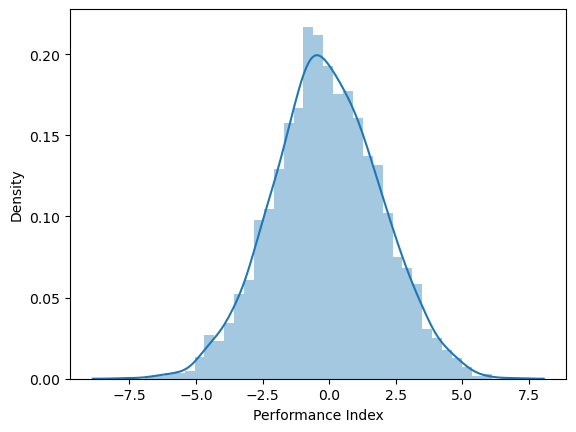

In [18]:
import seaborn as sns
sns.distplot(y_test-y_pred)
plt.show()

The provided code snippet calculates and displays the R-squared score, stored in the score variable, to evaluate the performance of a regression model in predicting student performance. The R-squared score is a statistical measure indicating how well the model's predictions fit the actual data, with higher scores representing better performance. This metric helps assess the goodness of fit of the model and its ability to explain the variance in student performance based on the input features. The score variable holds the calculated R-squared value and can be used to compare models or track model improvement.

In [19]:
from sklearn.metrics import r2_score
score= r2_score(y_test, y_pred)
score

0.9890110607021136

## About the score variable:
Purpose: The score variable stores the calculated R-squared value, which represents the goodness of fit of the regression model.

### Interpretation:
A higher score value (closer to 1) indicates that the model is doing a good job of predicting student performance based on the input features.
A lower score value (closer to 0) indicates that the model is not performing well and may need improvement.
Usage: The score variable can be used to compare the performance of different models or to track the improvement of a model over time.

## predicting unseen data

In [28]:

def predict_performance(hours_studied, previous_scores, extracurricular_activities, sleep_hours, sample_question_papers):
    """Predicts student performance index based on given input features."""

    # Create a DataFrame for the new data point
    new_data = pd.DataFrame({
        'Hours Studied': [hours_studied],
        'Previous Scores': [previous_scores],
        'Extracurricular Activities1': [extracurricular_activities1],
        'Sleep Hours': [sleep_hours],
        'Sample Question Papers Practiced': [sample_question_papers]
    })

   
    # Standardize the new data point using the same scaler used for training data
    new_data_scaled = sc.transform(new_data)

    # Make the prediction
    predicted_performance = regression.predict(new_data_scaled)

    return predicted_performance[0]


# Example usage:
hours_studied = 8
previous_scores = 80
extracurricular_activities1 = 1  # or '0'
sleep_hours = 7
sample_question_papers = 4

predicted_index = predict_performance(hours_studied, previous_scores, extracurricular_activities1, sleep_hours, sample_question_papers)
print(f"Predicted Performance Index: {predicted_index}")

Predicted Performance Index: 74.97768437918774
